### 5. Классификация и кластеризация

1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)                                    
2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety                                    
3.Разделите данные на выборку для обучения и тестирования                                    
4.Постройте модель LDA                                    
5.Визуализируйте предсказания для тестовой выборки и центры классов                                    
6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width                                 
7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию                    

In [26]:
from sklearn.datasets import load_iris 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

In [27]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.6, 0.6)],
     'green': [(0, 0.6, 0.6), (1, 0.6, 0.6)],
     'blue': [(0, 0.6, 0.6), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

 Расшифровка значений целевой переменной:                            
 0 — Setosa                            
 1 — Versicolor                       
 2 — Virginica

- Сначала посмотрим на то, что бы дал полный набор данных

In [49]:
# Оставляем лишь даные столбцов 'sepal length (cm)' и 'sepal width (cm)'
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.33, stratify=data_class, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predict = lda.predict(X_test)
result = pd.DataFrame([y_test, predict]).T
print(f'Точность НЕУРЕЗАННОЙ модели составляет {accuracy_score(y_test, predict) * 100} %')

Точность НЕУРЕЗАННОЙ модели составляет 98.0 %


- На полном наборе данных точность составляет 98%. Если убрать аргумент функции разделения данных "random_state=42", то точность могла бы быть еще выше. Оставим лишь нужные параметры, чтобы следовать условияю задания.

In [28]:
iris = load_iris()

# Оставляем лишь даные столбцов 'sepal length (cm)' и 'sepal width (cm)'
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.33, stratify=data_class, random_state=42)

# Создаем модель линейного дискриминантного анализа
lda = LinearDiscriminantAnalysis()

#Обучаем нашу модель
lda.fit(X_train, y_train)

#Предсказываем значения объясняемой переменной на тестовом наборе данных
predict = lda.predict(X_test)

#Объединяем все в один DF
result = pd.DataFrame([y_test, predict]).T

# Определим точность нашей модели
print(f'Точность модели составляет {accuracy_score(y_test, predict) * 100} %')

Точность модели составляет 82.0 %


- За счет того, что мы ограничили наши данные рассмотрением лишь двух переменных 'sepal length (cm)' и 'sepal width (cm)', точность нашей модели уменьшилась, так как у неё стало меньше даннных для обучения.

### Визуализируем тренировочный и тестовый набор данных

- Тренировочный набор даннных 

Text(0, 0.5, 'Ширина лепестка, см')

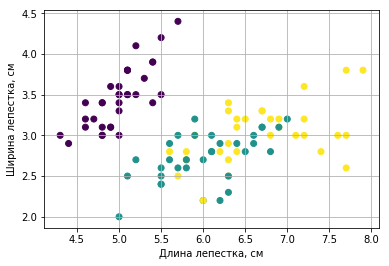

In [29]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

# Фиолетовый - 0 - Setosa
# Бирюзовый - 1 - Versicolor
# Желтый - 2 - Virginica

Как видно из диаграммы рассеяния, вид "Setosa" (фиолетовый) имеет довольно короткие лепестки, однако весьма широкие по сравнению с двумя соседями. Результаты наблюдений распологаются плотнее друг к другу, следовательно, дисперсия у данного класса меньше, чем у двух других. Также есть четкая граница разделения между данным классом и другими.

А вот виды "Virginica" (желтый) и "Versicolor" (бирюзовый) уже не имеют четкой границы разделения. У них часто наблюдается одинаковая ширина лепестка и длина. У желтого класса можно увидеть более длинный лепесток (самый длинный из всех трех классов), а также более широкий лепесток, чем у класса 1. Четкой границы разделения между классами 1 и 2 нет.

- Тестовый набор данных. Нахождение центроидов

Точность нашей модели составляет: 1.0
Важность признаков:
 [[-6.57122445  8.78108775]
 [ 2.33116667 -4.83163638]
 [ 4.4391858  -4.21554494]]


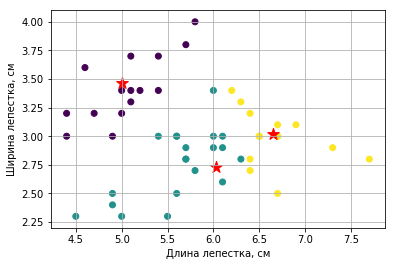

In [30]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=predict)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

# Фиолетовый - 0 - Setosa
# Бирюзовый - 1 - Versicolor
# Желтый - 2 - Virginica

print(f'Точность нашей модели составляет: {accuracy_score(predict, lda.predict(X_test))}')
print(f'Важность признаков:\n {lda.coef_}')

Точность нашей модели составила 100%. Видимо, для тестов оставлись очевидные данные. По-прежнему наблюдается четкая граница разделения между классом 0 и двумя другими. Также на тестовом наборе данных появилась некая граница разделения между классами 1 и 2. Центроиды классов 1 и 2 находятся близко друг к другу.

Анализируя значение lda.coef_, а также результаты последующего исследования лишь классов 1 и 2, можно сказать, что важность класса 1 (бирюзовый) и 2(желтый) примрно одинаковая ([ 4.4391858  -4.21554494]). В свою очередь, класс 0 имеет четкую границу разделения с другими классами. У классов 1 и 2 по оси Х больше вариантов значений, а вот по оси У они охватывают больше половины возможных значений. Поэтому предположу, что класс 0 менее важен при кластеризации, если я правильно понял трактовку значений lda.coef_.

К сожалению, не понял, как сделать красивое закрашивание каждого из 3-х классов, поэтому не использовал его вообще. Отдельно посмотрел разделение между классами 1 и 2.

### Отдельно провести LDA для классов 1 и 2

Text(0, 0.5, 'Ширина лепестка, см')

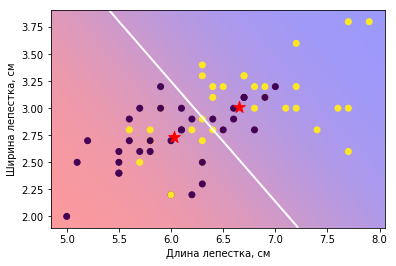

In [31]:
import numpy as np
small_train = X_train[(y_train == 1) | (y_train == 2)]

sy_train = y_train[(y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 1) | (y_test == 2)]

sy_test = y_test[(y_test == 1) | (y_test == 2)]

lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

После проведения LDA лишь для двух классов удалось красиво визуализировать результат. Оба признака важны для кластеризации, потому что линия разделения на уровне 55-60 градусов. Проверим коэффициенты дискретных линий для данных классов:

In [32]:
lda_small.coef_

array([[1.39874005, 1.26014843]])

Они очень близки по значению, что подтверждает ихз важность.

###  Кластеризация

- Уберем переменную с классами. Нет разделения на тестовую и обучающую выборки, работаем со всем набором данных

Text(0, 0.5, 'Ширина лепестка, см')

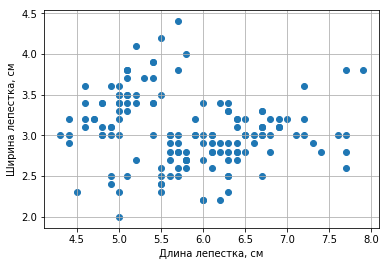

In [33]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

Text(0, 0.5, 'Ширина лепестка, см')

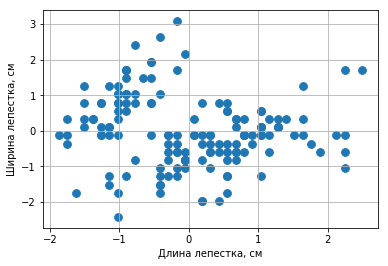

In [34]:
scaler = StandardScaler()
# fit-transform сразу обучается и преобразует данные
data_scaled = scaler.fit_transform(data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

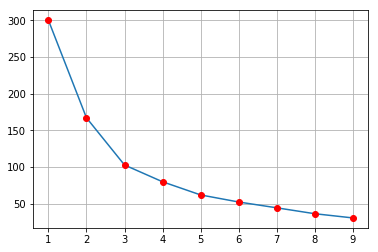

In [36]:
# строим график по методу "локтя"

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.grid()

Метод "Локтя" показал, что адекватно было бы использовать 3 кластера. Хотя, если не знать изначально, что в данных 3 кластера, можно было бы сделать выбор не только на 3, но и на 5, так как наклон отрезка 3-4 и 4-5 почти одинаковый, а далее уже заметно уменьшение угла наклона. Работаем с тремя классами.

Text(0, 0.5, 'Ширина лепестка, см')

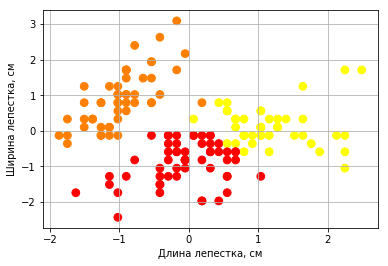

In [37]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

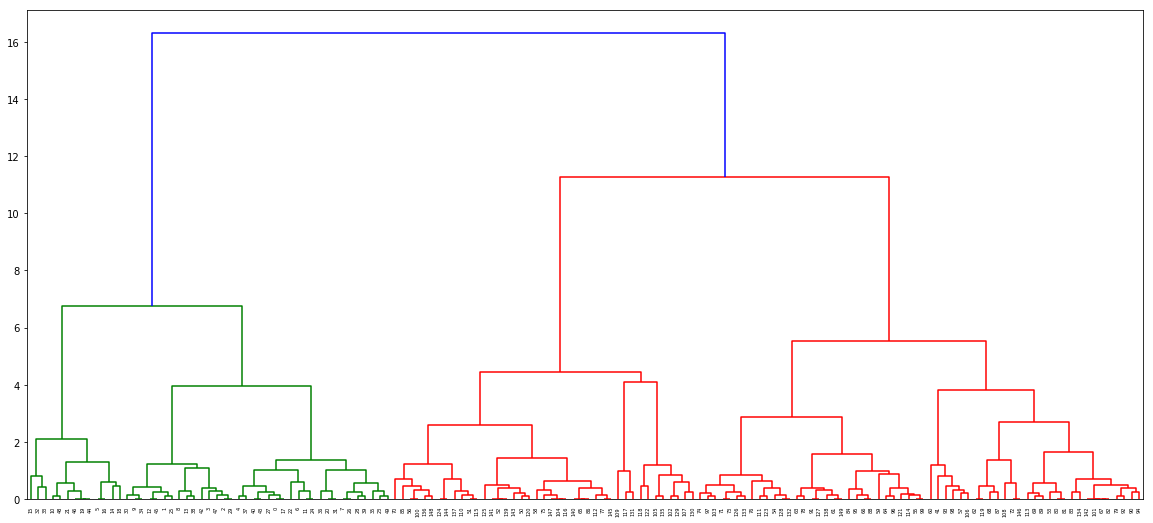

In [38]:
distance_mat = pdist(data_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

Видно, что алгоритм корректно разбил данные на 3 кластера.Посмотрим, каким был бы результат при разбиении на другое количество кластеров:

Text(0, 0.5, 'Ширина лепестка, см')

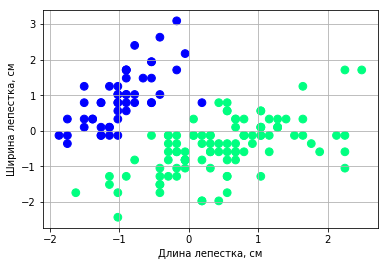

In [41]:
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='winter', c=clusters, s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

Если не знать изначально, сколько кластеров, то, наверное, очевидным выбором было бы 2 кластера.

Text(0, 0.5, 'Ширина лепестка, см')

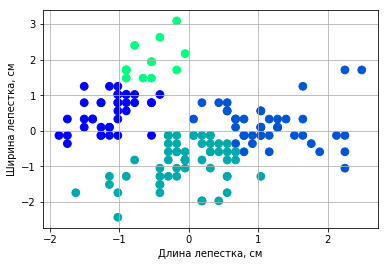

In [42]:
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='winter', c=clusters, s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

Text(0, 0.5, 'Ширина лепестка, см')

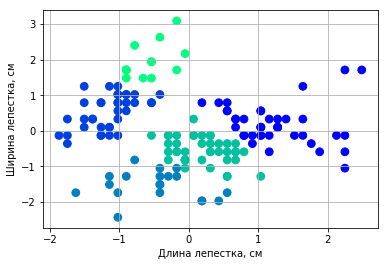

In [44]:
kmeans = KMeans(n_clusters=5)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='winter', c=clusters, s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

Text(0, 0.5, 'Ширина лепестка, см')

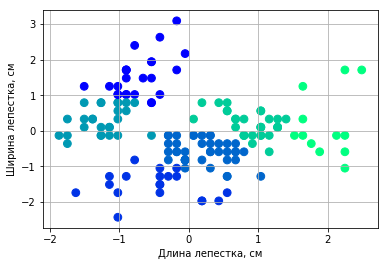

In [45]:
kmeans = KMeans(n_clusters=6)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='winter', c=clusters, s=60)
plt.grid()
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')

Разделение на 4, 5, 6 кластеров уже менее очевидное, так как нет какой-либо четкой визуальной границы между данными. Точки распределяются в кластера лишь по минимальным расстояниям к центроидам.